# Import

Í∏∞ÏóÖ ÏÑ±Í≥µÌôïÎ•† ÏòàÏ∏° Î™®Îç∏

In [104]:
%pip install pytorch-tabnet

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor

Note: you may need to restart the kernel to use updated packages.


# Data Load

In [105]:
#ÏõêÎ≥∏ Ïú†ÏßÄ
origin_train = pd.read_csv('train.csv')
origin_test = pd.read_csv('test.csv')

In [106]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

In [107]:
train.head()

ID  ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò Ïù∏ÏàòÏó¨Î∂Ä ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  \
0  TRAIN_0000  2009  CT005  Ïù¥Ïª§Î®∏Ïä§  Series A  4126.0   No   No      56.0   
1  TRAIN_0001  2023  CT006   ÌïÄÌÖåÌÅ¨      Seed  4167.0  Yes   No      80.0   
2  TRAIN_0002  2018  CT007    Í∏∞Ïà†  Series A  3132.0  Yes  Yes      54.0   
3  TRAIN_0003  2016  CT006   NaN      Seed  3245.0  Yes  Yes       NaN   
4  TRAIN_0004  2020  CT002  ÏóêÎìÄÌÖåÌÅ¨      Seed  1969.0   No  Yes      94.0   

   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  
0     3365.0   4764.0            4.71        NaN   0.3  
1     4069.0    279.0            1.00  2500-3500   0.8  
2     6453.0  12141.0            4.00  3500-4500   0.5  
3      665.0  10547.0            2.97        NaN   0.7  
4      829.0   9810.0            1.00  1500-2500   0.1

In [108]:
train.columns

Index(['ID', 'ÏÑ§Î¶ΩÏó∞ÎèÑ', 'Íµ≠Í∞Ä', 'Î∂ÑÏïº', 'Ìà¨ÏûêÎã®Í≥Ñ', 'ÏßÅÏõê Ïàò', 'Ïù∏ÏàòÏó¨Î∂Ä', 'ÏÉÅÏû•Ïó¨Î∂Ä', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
       'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)', 'ÏÑ±Í≥µÌôïÎ•†'],
      dtype='object')

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   int64  
 2   Íµ≠Í∞Ä              4376 non-null   object 
 3   Î∂ÑÏïº              3519 non-null   object 
 4   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   object 
 5   ÏßÅÏõê Ïàò            4202 non-null   float64
 6   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   object 
 7   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   object 
 8   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3056 non-null   float64
 9   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 10  Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 11  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 12  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3156 non-null   object 
 13  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 478

In [110]:
train.isna().sum()

ID                   0
ÏÑ§Î¶ΩÏó∞ÎèÑ                 0
Íµ≠Í∞Ä                   0
Î∂ÑÏïº                 857
Ìà¨ÏûêÎã®Í≥Ñ                 0
ÏßÅÏõê Ïàò               174
Ïù∏ÏàòÏó¨Î∂Ä                 0
ÏÉÅÏû•Ïó¨Î∂Ä                 0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)          1320
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)            0
Ïó∞Îß§Ï∂ú(ÏñµÏõê)              0
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)       0
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         1220
ÏÑ±Í≥µÌôïÎ•†                 0
dtype: int64

In [111]:
test.isna().sum()

ID                  0
ÏÑ§Î¶ΩÏó∞ÎèÑ                0
Íµ≠Í∞Ä                  0
Î∂ÑÏïº                354
Ìà¨ÏûêÎã®Í≥Ñ                0
ÏßÅÏõê Ïàò               76
Ïù∏ÏàòÏó¨Î∂Ä                0
ÏÉÅÏû•Ïó¨Î∂Ä                0
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)          547
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)           0
Ïó∞Îß§Ï∂ú(ÏñµÏõê)             0
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)      0
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         487
dtype: int64

- Í≤∞Ï∏°Ïπò Ïª¨Îüº: Î∂ÑÏïº(object), ÏßÅÏõêÏàò, Í≥†Í∞ùÏàò, Í∏∞ÏóÖÍ∞ÄÏπò(object)

In [112]:
#ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨
train = train.drop(columns=['ID'], axis = 1)
test = test.drop(columns=['ID'], axis = 1)

In [113]:
# Í∞Å Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
missing_ratio = train.isnull().mean().sort_values(ascending=False)

# Í≤∞Ï∏°Ïπò ÎπÑÏú®Ïù¥ 0Î≥¥Îã§ ÌÅ∞ Ïª¨ÎüºÎßå Ï∂îÏ∂ú
missing_ratio = missing_ratio[missing_ratio > 0]

# Î≥¥Í∏∞ Ï¢ãÍ≤å %Î°ú ÌëúÏãú
missing_ratio_percent = (missing_ratio * 100).round(2)
print(missing_ratio_percent)

Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)     30.16
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)    27.88
Î∂ÑÏïº           19.58
ÏßÅÏõê Ïàò          3.98
dtype: float64


C:\Users\starf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


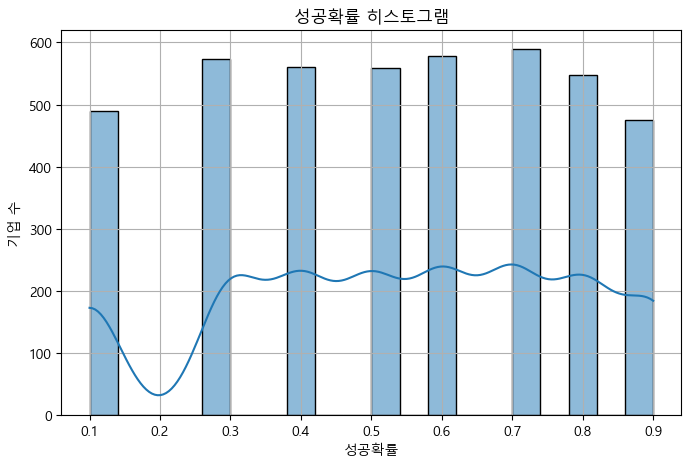

In [114]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (WindowsÏùò Í∏∞Î≥∏ Ìè∞Ìä∏Ïù∏ 'Malgun Gothic' ÏÇ¨Ïö©)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

# ÏòàÏãú: ÌïúÍ∏Ä Ìè¨Ìï®Îêú ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 5))
sns.histplot(train['ÏÑ±Í≥µÌôïÎ•†'], bins=20, kde=True)
plt.title('ÏÑ±Í≥µÌôïÎ•† ÌûàÏä§ÌÜ†Í∑∏Îû®')
plt.xlabel('ÏÑ±Í≥µÌôïÎ•†')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.grid(True)
plt.show()

In [115]:
# ÏÑ§Î¶ΩÏó∞ÎèÑ ÌÉÄÏûÖ Î≥ÄÌôò (int -> object)
train['ÏÑ§Î¶ΩÏó∞ÎèÑ'] =train['ÏÑ§Î¶ΩÏó∞ÎèÑ'].astype('object')
test['ÏÑ§Î¶ΩÏó∞ÎèÑ'] =test['ÏÑ§Î¶ΩÏó∞ÎèÑ'].astype('object')

category_features = ['ÏÑ§Î¶ΩÏó∞ÎèÑ','Íµ≠Í∞Ä','Î∂ÑÏïº','Ìà¨ÏûêÎã®Í≥Ñ','Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] #Î≤îÏ£ºÌòï
numeric_features = ['ÏßÅÏõê Ïàò','Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)','Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)','Ïó∞Îß§Ï∂ú(ÏñµÏõê)','SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'] #ÏàòÏπòÌòï
bool_features = ['Ïù∏ÏàòÏó¨Î∂Ä','ÏÉÅÏû•Ïó¨Î∂Ä'] 

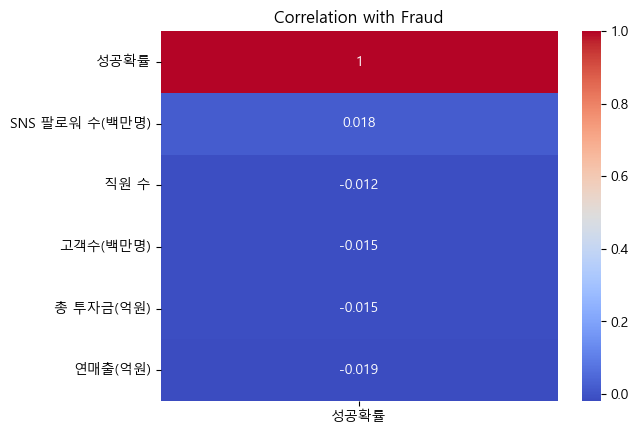

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏàòÏπòÌòï ÏπºÎüºÎßå ÏÑ†ÌÉù
numeric_cols = train.select_dtypes(include=['number'])

# ÌûàÌä∏Îßµ
sns.heatmap(numeric_cols.corr()[['ÏÑ±Í≥µÌôïÎ•†']].sort_values(by='ÏÑ±Í≥µÌôïÎ•†', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Fraud")
plt.show()

## ANOVA
- Ïó¨Îü¨ Í∑∏Î£π Í∞ÑÏùò ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î•º Í≤ÄÏ†ïÌïòÎäî ÌÜµÍ≥ÑÏ†Å Ï†àÏ∞®

In [117]:
train.columns

Index(['ÏÑ§Î¶ΩÏó∞ÎèÑ', 'Íµ≠Í∞Ä', 'Î∂ÑÏïº', 'Ìà¨ÏûêÎã®Í≥Ñ', 'ÏßÅÏõê Ïàò', 'Ïù∏ÏàòÏó¨Î∂Ä', 'ÏÉÅÏû•Ïó¨Î∂Ä', 'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
       'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)', 'ÏÑ±Í≥µÌôïÎ•†'],
      dtype='object')

### Í∞ÄÏÑ§ ÏÑ§Ï†ï (Ïù¥ÏßÑÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïó∞ÏÜçÌòï Í∞íÏùò ÌèâÍ∑† Ï∞®Ïù¥Î•º ÎπÑÍµêÌï† Í≤ÉÏûÑ)
- 1. Ïù∏ÏàòÏó¨Î∂Ä, ÏÉÅÏû•Ïó¨Î∂ÄÍ∞Ä Ï∞∏Ïù¥Î©¥ ÏÑ±Í≥µÌôïÎ•†ÏùÄ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§: Ïù∏Ïàò Ïó¨Î∂Ä/ÏÉÅÏû•Ïó¨Î∂ÄÏóê Îî∞Îùº ÏÑ±Í≥µÌôïÎ•†Ïùò ÌèâÍ∑†ÏùÄ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
    - ÎåÄÎ¶ΩÍ∞ÄÏÑ§: Ïù∏Ïàò/ÏÉÅÏû•Îêú Í∏∞ÏóÖÏù¥ Ïù∏Ïàò/ÏÉÅÏû•ÎêòÏßÄ ÏïäÏùÄ Í∏∞ÏóÖÎ≥¥Îã§ ÌèâÍ∑† ÏÑ±Í≥µÌôïÎ•†Ïù¥ ÎÜíÎã§.

In [118]:
# Î∂àÎ¶¨Ïñ∏ Í∞íÏùÑ 0Í≥º 1Î°ú Î≥ÄÌôò ('Yes' ‚Üí 1, 'No' ‚Üí 0 ÏúºÎ°ú Î≥ÄÌôò)
bool_map = {'Yes': 1, 'No': 0}

for feature in bool_features:
    train[feature] = train[feature].map(bool_map)
    test[feature] = test[feature].map(bool_map)

### ÎèÖÎ¶ΩÌëúÎ≥∏ t-Í≤ÄÏ†ï

In [119]:
from scipy.stats import ttest_ind

# ÏÉÅÏû• Ïó¨Î∂ÄÏóê Îî∞Îùº Í∑∏Î£π ÎÇòÎàÑÍ∏∞
group_listed = train[train['ÏÉÅÏû•Ïó¨Î∂Ä'] == 1]['ÏÑ±Í≥µÌôïÎ•†']
group_not_listed = train[train['ÏÉÅÏû•Ïó¨Î∂Ä'] == 0]['ÏÑ±Í≥µÌôïÎ•†']

# t-test ÏàòÌñâ
t_stat, p_value = ttest_ind(group_listed, group_not_listed, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 2.079154933489617, p-value: 0.037661451984323246


In [120]:
# Ïù∏Ïàò Ïó¨Î∂ÄÏóê Îî∞Îùº Í∑∏Î£π ÎÇòÎàÑÍ∏∞
group_listed = train[train['Ïù∏ÏàòÏó¨Î∂Ä'] == 1]['ÏÑ±Í≥µÌôïÎ•†']
group_not_listed = train[train['Ïù∏ÏàòÏó¨Î∂Ä'] == 0]['ÏÑ±Í≥µÌôïÎ•†']

# t-test ÏàòÌñâ
t_stat, p_value = ttest_ind(group_listed, group_not_listed, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -0.797801799825947, p-value: 0.4250290406586925


- ÏÉÅÏû• Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏÑ±Í≥µÌôïÎ•†Ïùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® (0.05 Ïù¥Ìïò)

### Ïù¥ÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù (Ïù∏ÏàòÏó¨Î∂Ä+ÏÉÅÏû•Ïó¨Î∂Ä)

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Îëê Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ìö®Í≥ºÎ•º ÎèôÏãúÏóê Î∂ÑÏÑù
model = ols('ÏÑ±Í≥µÌôïÎ•† ~ C(Ïù∏ÏàòÏó¨Î∂Ä) + C(ÏÉÅÏû•Ïó¨Î∂Ä) + C(Ïù∏ÏàòÏó¨Î∂Ä):C(ÏÉÅÏû•Ïó¨Î∂Ä)', data=train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                     sum_sq      df         F    PR(>F)
C(Ïù∏ÏàòÏó¨Î∂Ä)            0.033116     1.0  0.567174  0.451425
C(ÏÉÅÏû•Ïó¨Î∂Ä)            0.248108     1.0  4.249308  0.039325
C(Ïù∏ÏàòÏó¨Î∂Ä):C(ÏÉÅÏû•Ïó¨Î∂Ä)    0.021626     1.0  0.370382  0.542828
Residual         255.271702  4372.0       NaN       NaN


- ÏÉÅÏû•Ïó¨Î∂ÄÎßå ÏÑ±Í≥µÌôïÎ•†Ïóê Ïú†ÏùòÌïú Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î∞òÎ©¥,
- Ïù∏ÏàòÏó¨Î∂Ä ÏûêÏ≤¥ÎÇò Ïù∏Ïàò+ÏÉÅÏû•Ïùò ÏÉÅÌò∏ÏûëÏö©ÏùÄ Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú ÌåêÎ™Ö

In [122]:
# ÏÉÅÏû• Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏÑ±Í≥µÌôïÎ•† ÌèâÍ∑† ÎπÑÍµê
mean_success_by_listing = train.groupby('ÏÉÅÏû•Ïó¨Î∂Ä')['ÏÑ±Í≥µÌôïÎ•†'].mean()
print(mean_success_by_listing)

ÏÉÅÏû•Ïó¨Î∂Ä
0    0.530004
1    0.545196
Name: ÏÑ±Í≥µÌôïÎ•†, dtype: float64


- Í∑∏Îü¨ÎÇò Ïã§Ï†ú Ï∞®Ïù¥ ÌÅ¨Í∏∞Îäî ÏûëÏùå. Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Ï†ÅÏñ¥ÏÑú Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÏûëÏïÑÎèÑ Ïú†ÏùòÌï† Ïàò ÏûàÏùå

### Î≤îÏ£ºÌòï Î≥ÄÏàò ÏãúÍ∞ÅÌôî

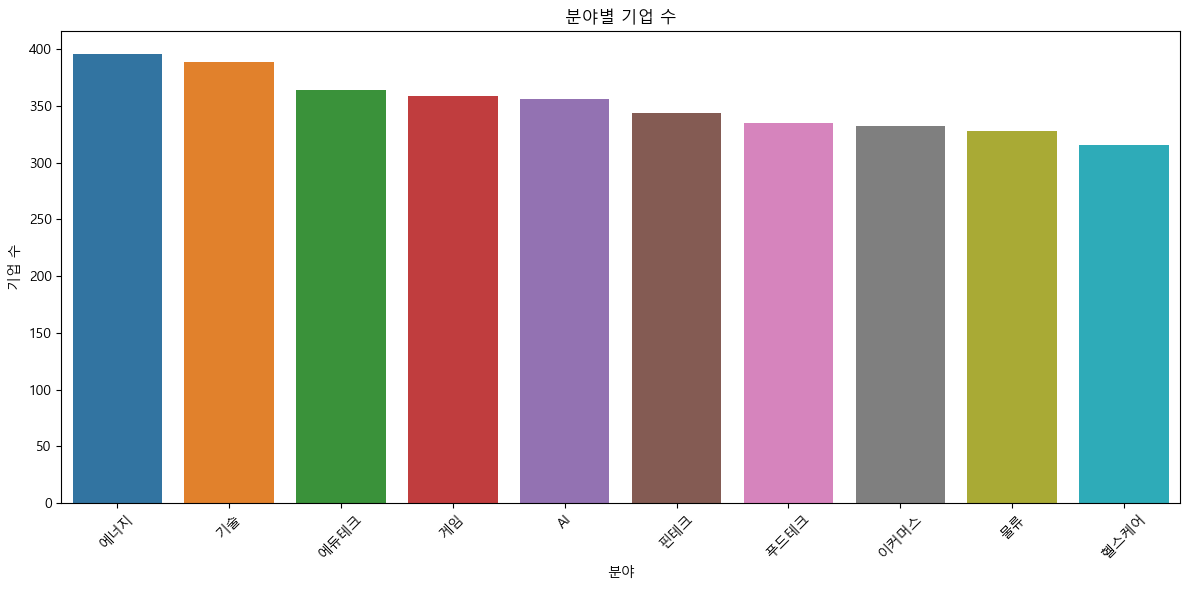

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Î∂ÑÏïº', order=train['Î∂ÑÏïº'].value_counts().index)

plt.title('Î∂ÑÏïºÎ≥Ñ Í∏∞ÏóÖ Ïàò')
plt.xlabel('Î∂ÑÏïº')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

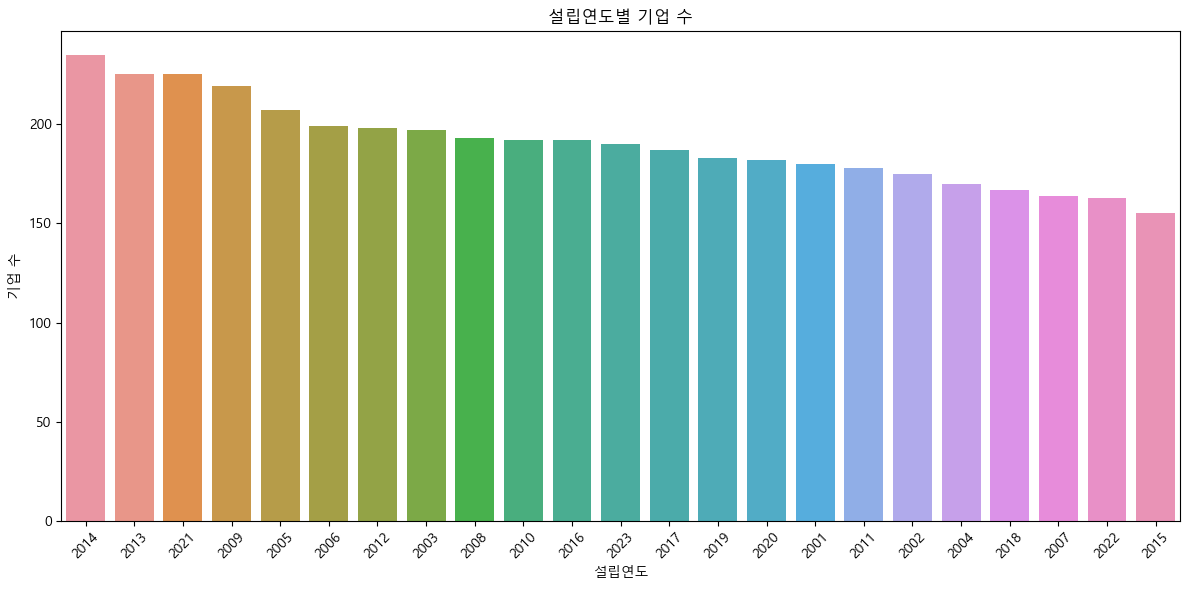

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='ÏÑ§Î¶ΩÏó∞ÎèÑ', order=train['ÏÑ§Î¶ΩÏó∞ÎèÑ'].value_counts().index)

plt.title('ÏÑ§Î¶ΩÏó∞ÎèÑÎ≥Ñ Í∏∞ÏóÖ Ïàò')
plt.xlabel('ÏÑ§Î¶ΩÏó∞ÎèÑ')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

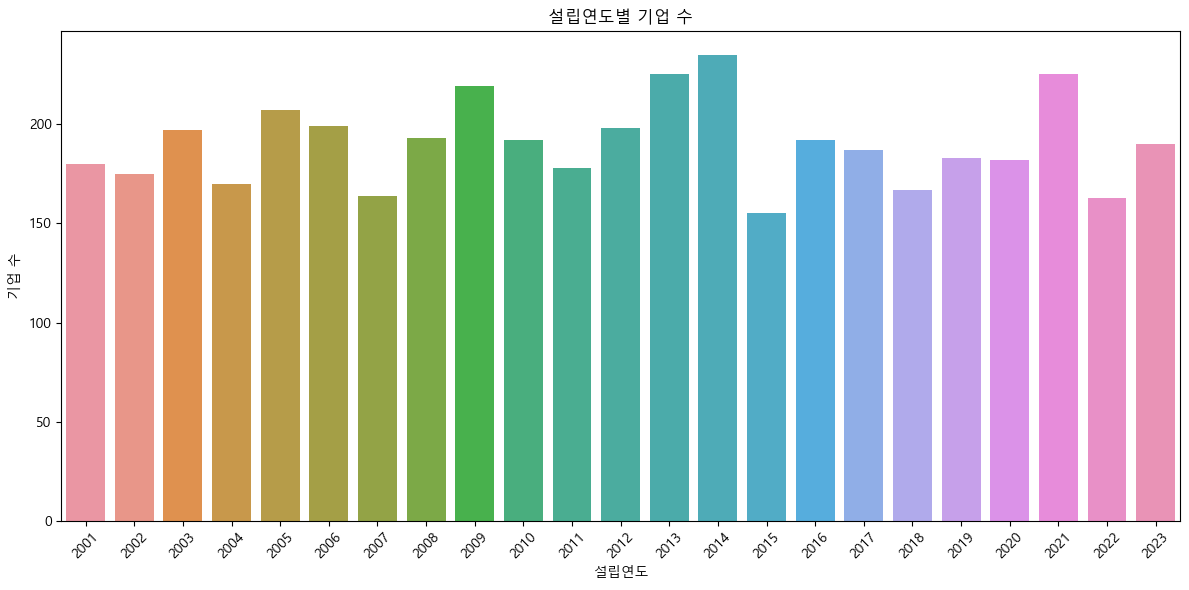

In [125]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='ÏÑ§Î¶ΩÏó∞ÎèÑ')

plt.title('ÏÑ§Î¶ΩÏó∞ÎèÑÎ≥Ñ Í∏∞ÏóÖ Ïàò')
plt.xlabel('ÏÑ§Î¶ΩÏó∞ÎèÑ')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

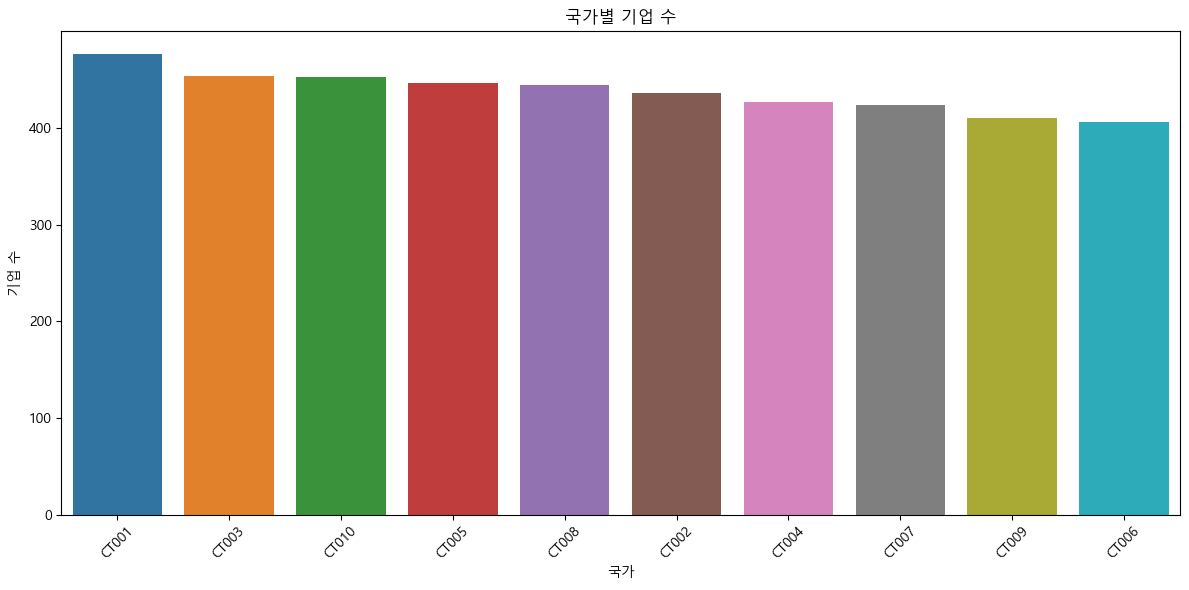

In [126]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Íµ≠Í∞Ä', order=train['Íµ≠Í∞Ä'].value_counts().index)

plt.title('Íµ≠Í∞ÄÎ≥Ñ Í∏∞ÏóÖ Ïàò')
plt.xlabel('Íµ≠Í∞Ä')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

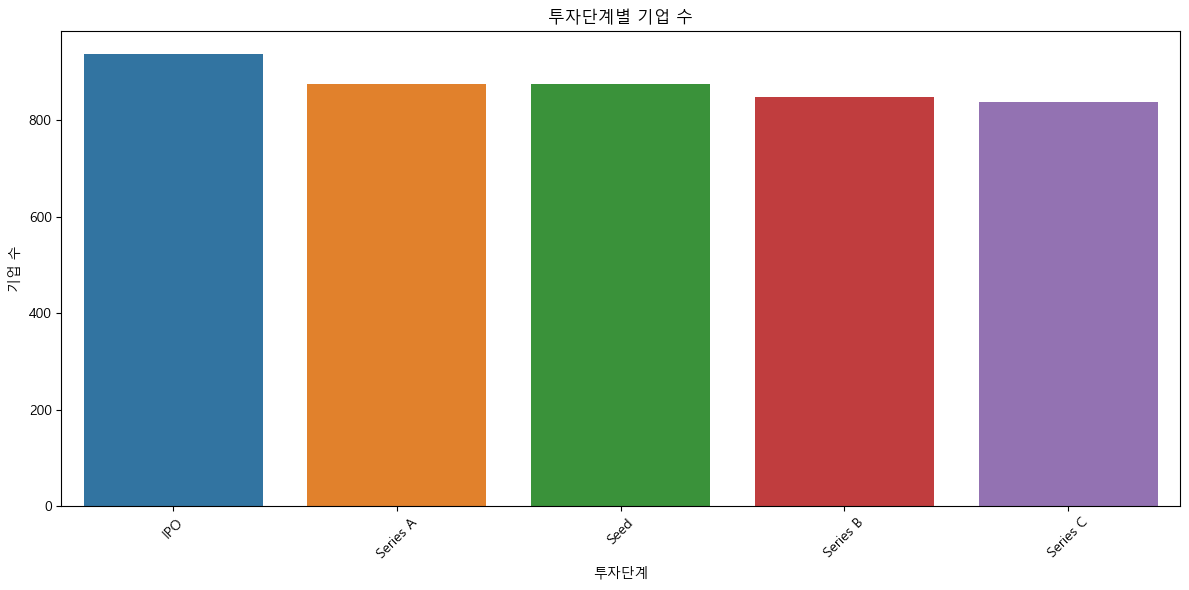

In [127]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Ìà¨ÏûêÎã®Í≥Ñ', order=train['Ìà¨ÏûêÎã®Í≥Ñ'].value_counts().index)

plt.title('Ìà¨ÏûêÎã®Í≥ÑÎ≥Ñ Í∏∞ÏóÖ Ïàò')
plt.xlabel('Ìà¨ÏûêÎã®Í≥Ñ')
plt.ylabel('Í∏∞ÏóÖ Ïàò')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Seed: ÏïÑÏù¥ÎîîÏñ¥ÏôÄ Ï¥àÍ∏∞ Ï†úÌíàÏùÑ ÏúÑÌïú ÏûêÍ∏à.

- Series A: Ï†úÌíàÍ≥º ÏãúÏû• Í≤ÄÏ¶ù ÌõÑ, ÏÑ±Ïû• ÌôïÎåÄÎ•º ÏúÑÌïú ÏûêÍ∏à.

- Series B: ÏÑ±Ïû•ÏùÑ ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÌôïÏû•ÌïòÍ≥†, Îçî ÌÅ∞ ÏãúÏû•ÏùÑ Î™©ÌëúÎ°ú ÌïòÎäî ÏûêÍ∏à.

- IPO: Ï£ºÏãù Í≥µÍ∞úÎ•º ÌÜµÌï¥ ÏûêÍ∏àÏùÑ Ï°∞Îã¨ÌïòÍ≥†, Í∏∞ÏóÖÏùÑ Í≥µÍ∞úÏ†ÅÏúºÎ°ú Ïö¥ÏòÅÌïòÎäî Îã®Í≥Ñ.

### Í∏∞ÏóÖÍ∞ÄÏπò Ï≤òÎ¶¨

- Í∏∞ÏóÖ Í∞ÄÏπò Ïò§Î∏åÏ†ùÌä∏ -> ÏàòÏπòÌòïÏúºÎ°ú Î≥ÄÌôò

In [128]:
import pandas as pd

def convert_range_to_mean(value):
    if pd.isna(value):
        return None
    if '-' in value:
        # '2500-3500' ‚Üí ÌèâÍ∑† Í≥ÑÏÇ∞
        start, end = value.split('-')
        return (int(start) + int(end)) / 2
    else:
        # Ïà´ÏûêÌòï Î¨∏ÏûêÏó¥Ïù¥Í±∞ÎÇò 'Missing' Ï≤òÎ¶¨Îêú Í∞í
        try:
            return float(value)
        except:
            return None

# Ï†ÅÏö©
train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï'] = train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].apply(convert_range_to_mean)

In [129]:
print(train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï'].dtype)  # float64Î°ú Î≥ÄÌôòÎêòÏñ¥Ïïº Ìï®

float64


In [130]:
train.head()

ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò  Ïù∏ÏàòÏó¨Î∂Ä  ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  \
0  2009  CT005  Ïù¥Ïª§Î®∏Ïä§  Series A  4126.0     0     0      56.0     3365.0   
1  2023  CT006   ÌïÄÌÖåÌÅ¨      Seed  4167.0     1     0      80.0     4069.0   
2  2018  CT007    Í∏∞Ïà†  Series A  3132.0     1     1      54.0     6453.0   
3  2016  CT006   NaN      Seed  3245.0     1     1       NaN      665.0   
4  2020  CT002  ÏóêÎìÄÌÖåÌÅ¨      Seed  1969.0     0     1      94.0      829.0   

   Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï  
0   4764.0            4.71        NaN   0.3            NaN  
1    279.0            1.00  2500-3500   0.8         3000.0  
2  12141.0            4.00  3500-4500   0.5         4000.0  
3  10547.0            2.97        NaN   0.7            NaN  
4   9810.0            1.00  1500-2500   0.1         2000.0

In [131]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ (ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò)
correlation = train[['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

               Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï      ÏÑ±Í≥µÌôïÎ•†
Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï       1.000000  0.009127
ÏÑ±Í≥µÌôïÎ•†                0.009127  1.000000


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   object 
 1   Íµ≠Í∞Ä              4376 non-null   object 
 2   Î∂ÑÏïº              3519 non-null   object 
 3   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   object 
 4   ÏßÅÏõê Ïàò            4202 non-null   float64
 5   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   int64  
 6   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   int64  
 7   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3056 non-null   float64
 8   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 9   Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 10  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 11  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3156 non-null   object 
 12  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
 13  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï   2563 non-null   float64
dtypes: float64(7), int64(2), object(

# ÌÉÄÏûÖ Î≥ÄÌôò (int -> object)
train['Ïù∏ÏàòÏó¨Î∂Ä'] =train['Ïù∏ÏàòÏó¨Î∂Ä'].astype('object')
test['ÏÉÅÏû•Ïó¨Î∂Ä'] =test['ÏÉÅÏû•Ïó¨Î∂Ä'].astype('object')

In [133]:
correlation = train[['ÏßÅÏõê Ïàò', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

          ÏßÅÏõê Ïàò      ÏÑ±Í≥µÌôïÎ•†
ÏßÅÏõê Ïàò  1.000000 -0.011831
ÏÑ±Í≥µÌôïÎ•† -0.011831  1.000000


In [134]:
correlation = train[['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

          Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)      ÏÑ±Í≥µÌôïÎ•†
Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  1.000000 -0.014746
ÏÑ±Í≥µÌôïÎ•†     -0.014746  1.000000


In [135]:
correlation = train[['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

           Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)      ÏÑ±Í≥µÌôïÎ•†
Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)   1.000000 -0.014939
ÏÑ±Í≥µÌôïÎ•†       -0.014939  1.000000


In [136]:
correlation = train[['Ïó∞Îß§Ï∂ú(ÏñµÏõê)', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

          Ïó∞Îß§Ï∂ú(ÏñµÏõê)      ÏÑ±Í≥µÌôïÎ•†
Ïó∞Îß§Ï∂ú(ÏñµÏõê)  1.000000 -0.018994
ÏÑ±Í≥µÌôïÎ•†    -0.018994  1.000000


In [137]:
correlation = train[['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)', 'ÏÑ±Í≥µÌôïÎ•†']].corr(method='pearson')
print(correlation)

                SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)      ÏÑ±Í≥µÌôïÎ•†
SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)        1.000000  0.017927
ÏÑ±Í≥µÌôïÎ•†                  0.017927  1.000000


- Î™®Îëê ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 1Ïóê Í∞ÄÍπùÏßÄ ÏïäÏùå (Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥ÏßÄÎäî ÏïäÏùå)
- ÎπÑÏÑ†ÌòïÌöåÍ∑Ä ÌòπÏùÄ Îã§Ï§ëÌöåÍ∑ÄÍ∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÑ

In [138]:
import statsmodels.api as sm

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï']
y = train['ÏÑ±Í≥µÌôïÎ•†']

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
data = pd.concat([X, y], axis=1).dropna()
X = data['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï']
y = data['ÏÑ±Í≥µÌôïÎ•†']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏)
X = sm.add_constant(X)

# ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   ÏÑ±Í≥µÌôïÎ•†   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2134
Date:                Wed, 14 May 2025   Prob (F-statistic):              0.644
Time:                        13:39:44   Log-Likelihood:                 10.864
No. Observations:                2563   AIC:                            -17.73
Df Residuals:                    2561   BIC:                            -6.031
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5243      0.015   

In [139]:
#ÏÑ±Í≥µÌôïÎ•†Ïù¥ 80% Ïù¥ÏÉÅ
train[train['ÏÑ±Í≥µÌôïÎ•†'] > 0.8]

ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò  Ïù∏ÏàòÏó¨Î∂Ä  ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  \
8     2005  CT002   NaN  Series B     NaN     0     0       NaN     2722.0   
12    2020  CT005    Í∏∞Ïà†      Seed   528.0     1     0      92.0      239.0   
14    2009  CT002  Ìó¨Ïä§ÏºÄÏñ¥      Seed   937.0     1     1      19.0     5522.0   
22    2004  CT007   NaN  Series A  4957.0     1     1       NaN       96.0   
26    2018  CT003    Í≤åÏûÑ       IPO   389.0     0     1      87.0       77.0   
...    ...    ...   ...       ...     ...   ...   ...       ...        ...   
4319  2021  CT010   NaN      Seed  4473.0     0     1       NaN     1577.0   
4334  2020  CT009    Í≤åÏûÑ      Seed  4449.0     0     1      64.0      196.0   
4342  2006  CT007  Ìó¨Ïä§ÏºÄÏñ¥  Series A  3695.0     1     1      45.0     1912.0   
4370  2005  CT006   NaN  Series A   237.0     0     0       NaN     6252.0   
4374  2001  CT007    AI       IPO  1438.0     0     0      53.0     2395.0   

      Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï  
8      2568.0            4.94        NaN   0.9            NaN  
12     2954.0            3.14        NaN   0.9            NaN  
14     6509.0            4.00  3500-4500   0.9         4000.0  
22     7304.0            4.08        NaN   0.9            NaN  
26      129.0            4.00  2500-3500   0.9         3000.0  
...       ...             ...        ...   ...            ...  
4319   4167.0            2.78        NaN   0.9            NaN  
4334   5098.0            4.00  1500-2500   0.9         2000.0  
4342   1362.0            2.95        NaN   0.9            NaN  
4370    759.0            4.31        NaN   0.9            NaN  
4374   3755.0            5.00  4500-6000   0.9         5250.0  

[475 rows x 14 columns]

In [140]:
train[train['ÏÑ±Í≥µÌôïÎ•†'] < 0.2]

ÏÑ§Î¶ΩÏó∞ÎèÑ     Íµ≠Í∞Ä    Î∂ÑÏïº      Ìà¨ÏûêÎã®Í≥Ñ    ÏßÅÏõê Ïàò  Ïù∏ÏàòÏó¨Î∂Ä  ÏÉÅÏû•Ïó¨Î∂Ä  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  \
4     2020  CT002  ÏóêÎìÄÌÖåÌÅ¨      Seed  1969.0     0     1      94.0      829.0   
11    2002  CT001  ÏóêÎìÄÌÖåÌÅ¨  Series C  1026.0     0     1      74.0     2301.0   
16    2009  CT003    Î¨ºÎ•ò      Seed  2083.0     1     1      61.0     2294.0   
25    2009  CT004   NaN      Seed  1098.0     1     0       NaN     2152.0   
38    2011  CT001    Í∏∞Ïà†  Series A  2127.0     1     0      85.0     3975.0   
...    ...    ...   ...       ...     ...   ...   ...       ...        ...   
4350  2004  CT004  Ìó¨Ïä§ÏºÄÏñ¥  Series B   512.0     1     0      91.0      774.0   
4352  2010  CT009    Í∏∞Ïà†  Series C  3284.0     0     1      18.0     5885.0   
4360  2003  CT003   NaN  Series C     NaN     0     0       NaN     4786.0   
4361  2014  CT001   NaN  Series A  4971.0     1     0       NaN     2820.0   
4364  2002  CT002   NaN  Series B  1980.0     1     1       NaN     4875.0   

      Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï  
4      9810.0            1.00  1500-2500   0.1         2000.0  
11     9308.0            2.00  2500-3500   0.1         3000.0  
16     5652.0            1.00  4500-6000   0.1         5250.0  
25    10885.0            0.80        NaN   0.1            NaN  
38     7481.0            1.00  3500-4500   0.1         4000.0  
...       ...             ...        ...   ...            ...  
4350   6278.0            4.00  4500-6000   0.1         5250.0  
4352   2880.0            1.00  4500-6000   0.1         5250.0  
4360   4053.0            1.15        NaN   0.1            NaN  
4361  10761.0            3.84  2500-3500   0.1         3000.0  
4364   8403.0            4.12  4500-6000   0.1         5250.0  

[490 rows x 14 columns]

| ÏïåÍ≥†Î¶¨Ï¶ò                                                                  | Í∞úÎÖê ÏöîÏïΩ                | Ïû•Ï†ê                                           | Îã®Ï†ê                                   | Ï∂îÏ≤ú ÏÉÅÌô©               |
| --------------------------------------------------------------------- | -------------------- | -------------------------------------------- | ------------------------------------ | ------------------- |
| **1. ÏÑ†Ìòï ÌöåÍ∑Ä (Linear Regression)**                                      | ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏÑ†Ìòï Ï°∞Ìï©ÏúºÎ°ú ÌÉÄÍπÉ ÏòàÏ∏°  | - Îπ†Î•¥Í≥† Ìï¥ÏÑù Ïâ¨ÏõÄ<br>- Í≥ºÏ†ÅÌï© Ï†ÅÏùå                      | - ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÏóê ÏïΩÌï®<br>- Ïù¥ÏÉÅÏπòÏóê ÎØºÍ∞ê            | - Îã®ÏàúÌïòÍ≥† ÏÑ†Ìòï Í¥ÄÍ≥Ñ ÏòàÏÉÅÎê† Îïå  |
| **2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÌöåÍ∑Ä (RandomForestRegressor)**                             | Ïó¨Îü¨ Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÏïôÏÉÅÎ∏îÌï¥ ÌèâÍ∑† ÏòàÏ∏° | - ÎπÑÏÑ†ÌòïÎèÑ Ïûò Ï≤òÎ¶¨<br>- Ïù¥ÏÉÅÏπòÏôÄ Í≤∞Ï∏°ÏπòÏóê Í∞ïÌï®<br>- Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†úÍ≥µ | - ÎäêÎ¶¥ Ïàò ÏûàÏùå<br>- Ìï¥ÏÑù Ïñ¥Î†§ÏõÄ                | - Îç∞Ïù¥ÌÑ∞Í∞Ä Î≥µÏû°ÌïòÍ≥† ÎπÑÏÑ†ÌòïÏùº Îïå  |
| **3. Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ ÌöåÍ∑Ä (GradientBoostingRegressor / XGBoost / LightGBM)** | ÏïΩÌïú Î™®Îç∏ÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Í∞úÏÑ†ÌïòÎäî Î∞©Ïãù | - Í≥†ÏÑ±Îä•<br>- Ï†ïÍµêÌïú ÏòàÏ∏° Í∞ÄÎä•<br>- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Îã§Ïñë         | - Í≥ºÏ†ÅÌï© ÏúÑÌóò<br>- ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï ÌïÑÏöî             | - Ï†ïÌôïÎèÑÍ∞Ä Ï§ëÏöîÌïú Í≤ΩÏö∞, ÎåÄÌöå Îì± |
| **4. KNN ÌöåÍ∑Ä (KNeighborsRegressor)**                                   | Ï£ºÎ≥ÄÏùò KÍ∞ú Ïù¥ÏõÉÏùò ÌèâÍ∑†ÏúºÎ°ú ÏòàÏ∏°   | - Î™®Îç∏ Íµ¨Ï°∞ Í∞ÑÎã®<br>- ÌõàÎ†® ÏãúÍ∞Ñ Í±∞Ïùò ÏóÜÏùå                  | - ÏòàÏ∏° ÎäêÎ¶º<br>- Í≥†Ï∞®ÏõêÏóêÏÑú ÏÑ±Îä• Ï†ÄÌïò<br>- Ïù¥ÏÉÅÏπò ÎØºÍ∞ê | - Îç∞Ïù¥ÌÑ∞ Ïàò Ï†ÅÍ≥† Îã®ÏàúÌï† Îïå    |
| **5. Ïã†Í≤ΩÎßù ÌöåÍ∑Ä (MLPRegressor / Îî•Îü¨Îãù)**                                    | Ïó¨Îü¨ ÏùÄÎãâÏ∏µÏùÑ ÌÜµÌï¥ Î≥µÏû°Ìïú Ìï®Ïàò Í∑ºÏÇ¨ | - Í≥†Ï∞®Ïõê, Î≥µÏû°Ìïú Ìå®ÌÑ¥ Ïûò Ïû°Ïùå<br>- ÎπÑÏÑ†Ìòï Î™®Îç∏ÎßÅ Ïö∞Ïàò           | - ÌïôÏäµÏãúÍ∞Ñ Í∏∏Í≥†<br>- Í≥ºÏ†ÅÌï© ÏúÑÌóò<br>- Ìï¥ÏÑù Ïñ¥Î†§ÏõÄ    | - Îç∞Ïù¥ÌÑ∞ ÎßéÍ≥† Î≥µÏû°Ìïú Î¨∏Ï†úÏóê Ï†ÅÌï© |


Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ Î∂ÄÏä§ÌåÖ ÌöåÍ∑Ä (GradientBoostingRegressor / XGBoost / LightGBM)

In [141]:
train.isna().sum()# Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï Ïª¨Îüº Îî∞Î°ú Ï†ÄÏû•
Í∏∞ÏóÖÍ∞ÄÏπò_ÏàòÏπòÌòï = train['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï'].copy()

# trainÏóêÏÑú Ìï¥Îãπ Ïª¨Îüº Ï†úÍ±∞
train = train.drop(columns=['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)_ÏàòÏπòÌòï'])

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   object 
 1   Íµ≠Í∞Ä              4376 non-null   object 
 2   Î∂ÑÏïº              3519 non-null   object 
 3   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   object 
 4   ÏßÅÏõê Ïàò            4202 non-null   float64
 5   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   int64  
 6   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   int64  
 7   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3056 non-null   float64
 8   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 9   Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 10  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 11  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3156 non-null   object 
 12  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 444.6+ KB


In [143]:
# LabelEncoder Í∞ùÏ≤¥Î•º Í∞Å Î≤îÏ£ºÌòï featureÎ≥ÑÎ°ú Îî∞Î°ú Ï†ÄÏû•ÌïòÏó¨ ÏÇ¨Ïö©
encoders = {}

# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º encoding
for feature in category_features:
    encoders[feature] = LabelEncoder()
    train[feature] = train[feature].fillna('Missing')
    test[feature] = test[feature].fillna('Missing')
    train[feature] = encoders[feature].fit_transform(train[feature])
    test[feature] = encoders[feature].transform(test[feature])

# ÏàòÏπòÌòï Î≥ÄÏàò Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í∞íÏúºÎ°ú ÎåÄÏ≤¥
for feature in numeric_features:
    mean_value = train[feature].mean()
    train[feature] = train[feature].fillna(mean_value)
    test[feature] = test[feature].fillna(mean_value)

# TabNetÏö© Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏Îç±Ïä§(cat_idxs) Î∞è Ï∞®Ïõê(cat_dims) ÏÑ§Ï†ï
features = [col for col in train.columns if col != 'ÏÑ±Í≥µÌôïÎ•†']
cat_idxs = [features.index(col) for col in category_features]
cat_dims = [train[col].max() + 1 for col in category_features]

In [144]:
train = train

# K-Fold Model Training

- K-FoldÏôÄ GradientBoostingRegressor ÏÑ±Îä• ÎπÑÍµê

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import numpy as np

# Í∞ÄÏ†ï: features, cat_idxs, cat_dims, train = Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å ÏÉÅÌÉú

X = train[features]
y = train['ÏÑ±Í≥µÌôïÎ•†']

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

tabnet_models, gbr_models = [], []
tabnet_scores, gbr_scores = [], []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"\nüîÅ Fold {fold+1}/{N_FOLDS}")

    X_train = X.iloc[train_idx].values
    y_train = y.iloc[train_idx].values.reshape(-1, 1)
    X_valid = X.iloc[valid_idx].values
    y_valid = y.iloc[valid_idx].values.reshape(-1, 1)

    # ‚öôÔ∏è Pretraining TabNet
    pretrainer = TabNetPretrainer(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        seed=42,
        verbose=0
    )
    pretrainer.fit(
        X_train=X_train,
        max_epochs=100,
        batch_size=512,
        virtual_batch_size=64
    )

    # ‚úÖ TabNet Fine-tuning
    tabnet_model = TabNetRegressor(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        seed=42,
        verbose=0,
        optimizer_fn=torch.optim.AdamW
    )
    tabnet_model.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        from_unsupervised=pretrainer,
        eval_metric=['mae'],
        max_epochs=100,
        patience=10
    )
    tabnet_models.append(tabnet_model)
    tabnet_scores.append(tabnet_model.best_cost)
    print(f"üìâ TabNet MAE: {tabnet_model.best_cost:.4f}")

    # ‚úÖ Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(random_state=42)
    gbr_model.fit(X_train, y_train.ravel())
    gbr_pred = gbr_model.predict(X_valid)
    gbr_mae = mean_absolute_error(y_valid, gbr_pred)
    gbr_models.append(gbr_model)
    gbr_scores.append(gbr_mae)
    print(f"üå≤ GBR MAE: {gbr_mae:.4f}")

# ÌèâÍ∑† ÏÑ±Îä• Ï∂úÎ†•
print("\n‚úÖ Î™®Îì† fold ÌïôÏäµ ÏôÑÎ£å!")
print(f"\nüìä TabNet ÌèâÍ∑† MAE: {np.mean(tabnet_scores):.4f}")
print(f"üìä GBR ÌèâÍ∑† MAE: {np.mean(gbr_scores):.4f}")



üîÅ Fold 1/5


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")



Early stopping occurred at epoch 48 with best_epoch = 38 and best_val_0_mae = 0.2035


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


üìâ TabNet MAE: 0.2035
üå≤ GBR MAE: 0.2067

üîÅ Fold 2/5


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_mae = 0.20604


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


üìâ TabNet MAE: 0.2060
üå≤ GBR MAE: 0.2070

üîÅ Fold 3/5


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_mae = 0.20658
üìâ TabNet MAE: 0.2066


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


üå≤ GBR MAE: 0.2024

üîÅ Fold 4/5


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_mae = 0.20125


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


üìâ TabNet MAE: 0.2013
üå≤ GBR MAE: 0.2023

üîÅ Fold 5/5


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")



Early stopping occurred at epoch 56 with best_epoch = 46 and best_val_0_mae = 0.20536


C:\Users\starf\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


üìâ TabNet MAE: 0.2054
üå≤ GBR MAE: 0.2068

‚úÖ Î™®Îì† fold ÌïôÏäµ ÏôÑÎ£å!

üìä TabNet ÌèâÍ∑† MAE: 0.2045
üìä GBR ÌèâÍ∑† MAE: 0.2050


# ÌÉÄÍ≤ü ÏßÄÏ†ï
target = train['ÏÑ±Í≥µÌôïÎ•†']  
X = train[features]
y = target

# KFold ÏÑ§Ï†ï
N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

models = [] # Î™®Îç∏ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
cv_scores = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"\nüîÅ Fold {fold+1}/{N_FOLDS}")
    
    X_train = X.iloc[train_idx].values
    y_train = y.iloc[train_idx].values.reshape(-1, 1)
    
    X_valid = X.iloc[valid_idx].values
    y_valid = y.iloc[valid_idx].values.reshape(-1, 1)
    
    # ÎπÑÏßÄÎèÑ ÏÇ¨Ï†ÑÌïôÏäµ
    print("‚ñ∂ Pretraining...")

    pretrainer = TabNetPretrainer(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        seed=42,
        verbose=0
    )

    pretrainer.fit(
        X_train=X_train,
        max_epochs=100,
        batch_size=512,
        virtual_batch_size=64
    )

    # ÏßÄÎèÑ ÌïôÏäµ 
    print("‚ñ∂ Fine-tuning...")
    model = TabNetRegressor(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        seed=42,
        verbose=0,
        optimizer_fn=torch.optim.AdamW 
    )

    model.fit(
        X_train=X_train, y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        from_unsupervised=pretrainer,
        eval_metric=['mae'],
        max_epochs=100,
        patience=10
    )

    # Î™®Îç∏ÏùÑ Î©îÎ™®Î¶¨Ïóê Ï†ÄÏû•
    models.append(model)
    cv_scores.append(model.best_cost)

print("\n‚úÖ Î™®Îì† fold Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å!")

# K-Fold Model Prediction

# Ï†ÄÏû•Îêú Î™®Îç∏Îì§Î°ú ÏòàÏ∏°
predictions_list = []

for fold, model in enumerate(models):
    print(f"Predict with fold {fold+1}")
    preds = model.predict(test[features].values)
    predictions_list.append(preds)

# ÌèâÍ∑† ÏòàÏ∏°
final_predictions = np.mean(predictions_list, axis=0)

# Submission

sample_submission['ÏÑ±Í≥µÌôïÎ•†'] = final_predictions
sample_submission.to_csv('./baseline_submission.csv', index = False, encoding = 'utf-8-sig')